In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import joblib

In [51]:
train_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/train"
test_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/test"
val_path = "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/validation"

In [52]:
IMG_SIZE = (100, 100)
train_images=tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,image_size=IMG_SIZE,batch_size=30,shuffle=False)
test_images= tf.keras.preprocessing.image_dataset_from_directory(directory=test_path, image_size=IMG_SIZE,batch_size=30,shuffle=False)
val_images= tf.keras.preprocessing.image_dataset_from_directory(directory=val_path, image_size=IMG_SIZE,batch_size=30,shuffle=False)

Found 460 files belonging to 3 classes.
Found 130 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [53]:
class_names = train_images.class_names
print(class_names)

['apple', 'banana', 'orange']


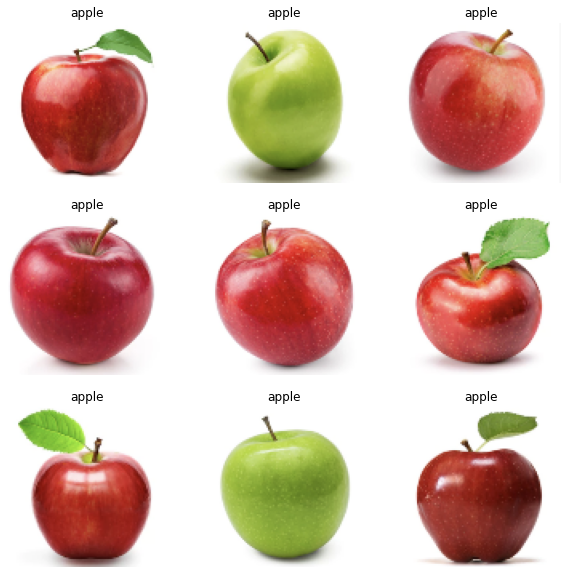

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [55]:
for image_batch, labels_batch in test_images:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(30, 100, 100, 3)
(30,)


In [56]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_images.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_images.cache().prefetch(buffer_size=AUTOTUNE)

In [57]:
model1 = Sequential([

    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(100,100,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),

    Flatten(),
    Dense(units=131,activation='softmax'),
])

In [58]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_2 (Dense)             (None, 131)              

In [59]:
model1.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [60]:
#model1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
results=model1.fit(train_images,
                   validation_data=val_ds,
                   epochs=10)

Epoch 1/10
16/16 [==============================] - 6s 373ms/step - loss: 158.4288 - accuracy: 0.4717 - val_loss: 174.2906 - val_accuracy: 0.3182
Epoch 2/10
16/16 [==============================] - 6s 357ms/step - loss: 73.4056 - accuracy: 0.0848 - val_loss: 32.4448 - val_accuracy: 0.5152
Epoch 3/10
16/16 [==============================] - 6s 348ms/step - loss: 14.0780 - accuracy: 0.3565 - val_loss: 1.7223 - val_accuracy: 0.5152
Epoch 4/10
16/16 [==============================] - 4s 260ms/step - loss: 1.1870 - accuracy: 0.4348 - val_loss: 1.6056 - val_accuracy: 0.6061
Epoch 5/10
16/16 [==============================] - 5s 293ms/step - loss: 2.4594 - accuracy: 0.5652 - val_loss: 1.7885 - val_accuracy: 0.7424
Epoch 6/10
16/16 [==============================] - 5s 334ms/step - loss: 0.7856 - accuracy: 0.6717 - val_loss: 1.8764 - val_accuracy: 0.5909
Epoch 7/10
16/16 [==============================] - 6s 350ms/step - loss: 0.6428 - accuracy: 0.6935 - val_loss: 2.1369 - val_accuracy: 0.5455

In [62]:
test_model, test_acc = model1.evaluate(test_images, verbose=2)
print('\nTest accuracy:', test_acc)

5/5 - 1s - loss: 32.3175 - accuracy: 0.3615 - 905ms/epoch - 181ms/step

Test accuracy: 0.36153846979141235


In [63]:
probability_model = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])

In [64]:
predictions = probability_model.predict(test_images)

5/5 [==============================] - 1s 105ms/step


In [65]:
joblib.dump(model1, 'model1.pkl')

['model1.pkl']

In [67]:
model1.save('/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/model1')